In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('drug200.csv')

In [3]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [4]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [6]:
#Reviewing if there are any null values in the data frame
df.isnull().values.any()

False

<AxesSubplot:xlabel='Drug', ylabel='count'>

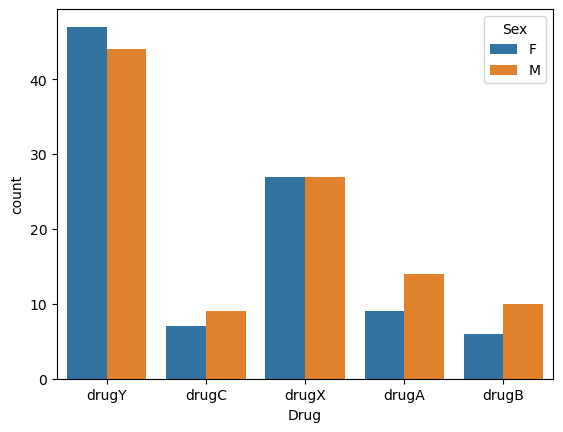

In [7]:
#Some exploratory data analysis. Looks like drugs A, B, and C have higher counts for men, but no strong conclusions
sns.countplot(x = 'Drug', data = df, hue = 'Sex')

<AxesSubplot:xlabel='Drug', ylabel='count'>

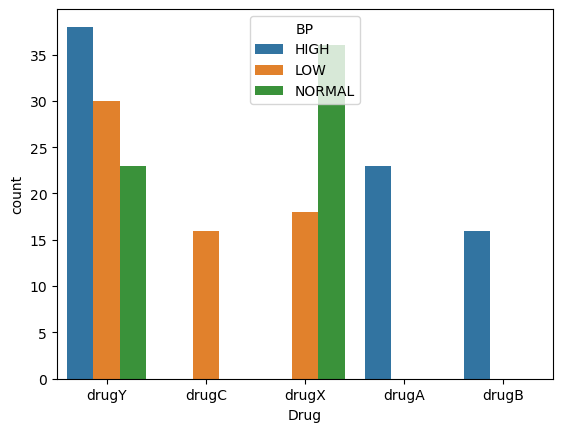

In [8]:
#Here it looks like drugs C and X are never given to soemone with high blood pressure, and drugs A and B are only given to someone with high blood pressure
sns.countplot(x = 'Drug', data = df, hue = 'BP')

<AxesSubplot:xlabel='Drug', ylabel='count'>

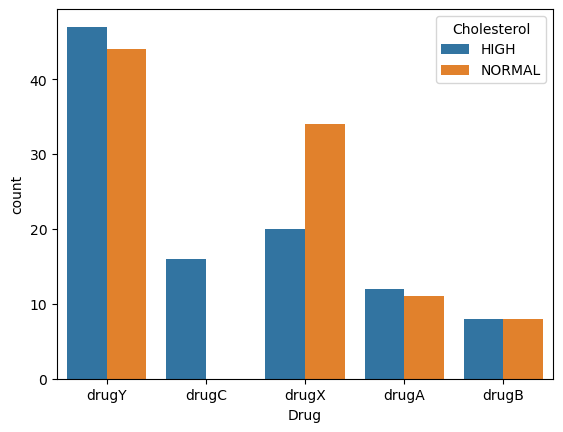

In [9]:
sns.countplot(x = 'Drug', data = df, hue = 'Cholesterol')

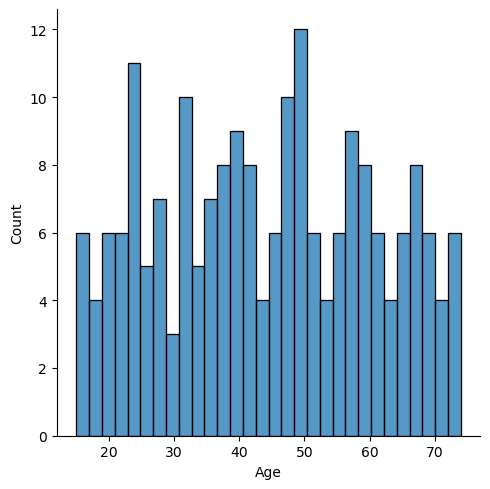

In [10]:
#Ages in this study don't look skewed
sns.displot(df['Age'], kde = False, bins = 30)

In [11]:
#We are creating dummy variables because this algorithm requires numeric input data
sex = pd.get_dummies(df['Sex'], drop_first = True)

In [12]:
bp = pd.get_dummies(df['BP'], drop_first = True)

In [13]:
cholesterol = pd.get_dummies(df['Cholesterol'], drop_first = True)

In [14]:
#Here we are dropping the columns we made dummy variables for
df.drop(['Sex', 'BP', 'Cholesterol'], axis = 1, inplace = True)

In [15]:
df.head()

,Age,Na_to_K,Drug
0,23,25.355,drugY
1,47,13.093,drugC
2,47,10.114,drugC
3,28,7.798,drugX
4,61,18.043,drugY


In [16]:
df = pd.concat([df, sex, bp, cholesterol], axis = 1)

In [17]:
df.head()

,Age,Na_to_K,Drug,M,LOW,NORMAL,NORMAL
0,23,25.355,drugY,0,0,0,0
1,47,13.093,drugC,1,1,0,0
2,47,10.114,drugC,1,1,0,0
3,28,7.798,drugX,0,0,1,0
4,61,18.043,drugY,0,1,0,0


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X = df.drop('Drug', axis = 1)
y = df['Drug']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=101)

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
dtree = DecisionTreeClassifier()

In [23]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [24]:
predictions = dtree.predict(X_test)

In [25]:
from sklearn.metrics import classification_report, confusion_matrix

In [26]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00        14
       drugB       1.00      1.00      1.00        12
       drugC       1.00      1.00      1.00        14
       drugX       1.00      0.97      0.99        37
       drugY       0.98      1.00      0.99        63

    accuracy                           0.99       140
   macro avg       1.00      0.99      1.00       140
weighted avg       0.99      0.99      0.99       140



In [27]:
#Looks like the decision tree method did well! We'll compare it to the random forest method below
print(confusion_matrix(y_test, predictions))

[[14  0  0  0  0]
 [ 0 12  0  0  0]
 [ 0  0 14  0  0]
 [ 0  0  0 36  1]
 [ 0  0  0  0 63]]


In [28]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [29]:
rfc_pred = rfc.predict(X_test)

In [30]:
#Unfortunately, it looks like the random forest method didn't perform quite as well here
print(confusion_matrix(y_test, rfc_pred))

[[14  0  0  0  0]
 [ 0 12  0  0  0]
 [ 2  0  8  4  0]
 [ 0  0  1 35  1]
 [ 0  0  0  0 63]]


In [31]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

       drugA       0.88      1.00      0.93        14
       drugB       1.00      1.00      1.00        12
       drugC       0.89      0.57      0.70        14
       drugX       0.90      0.95      0.92        37
       drugY       0.98      1.00      0.99        63

    accuracy                           0.94       140
   macro avg       0.93      0.90      0.91       140
weighted avg       0.94      0.94      0.94       140

